# 这个是模型的训练

In [1]:


from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary

train = []

fp = open('/Users/guozikun/Desktop/我的电脑/GitHub/GZK_Code/HELP_GUNGUN/jieba_data_short.txt','r',encoding='utf-8')
for line in fp:
    if line != '':
        line = line.split()
        train.append([w for w in line])
temp_lst = []
for i in train[0]:
    temp_lst.append(i.split(","))
dictionary = corpora.Dictionary(temp_lst)
corpus = [dictionary.doc2bow(text) for text in temp_lst]

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, passes=10)
# num_topics：主题数目
# passes：训练伦次
# num_words：每个主题下输出的term的数目

for topic in lda.print_topics(num_words = 20):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')



/Users/guozikun/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


KeyboardInterrupt: 

# 结合gensim调用api实现可视化

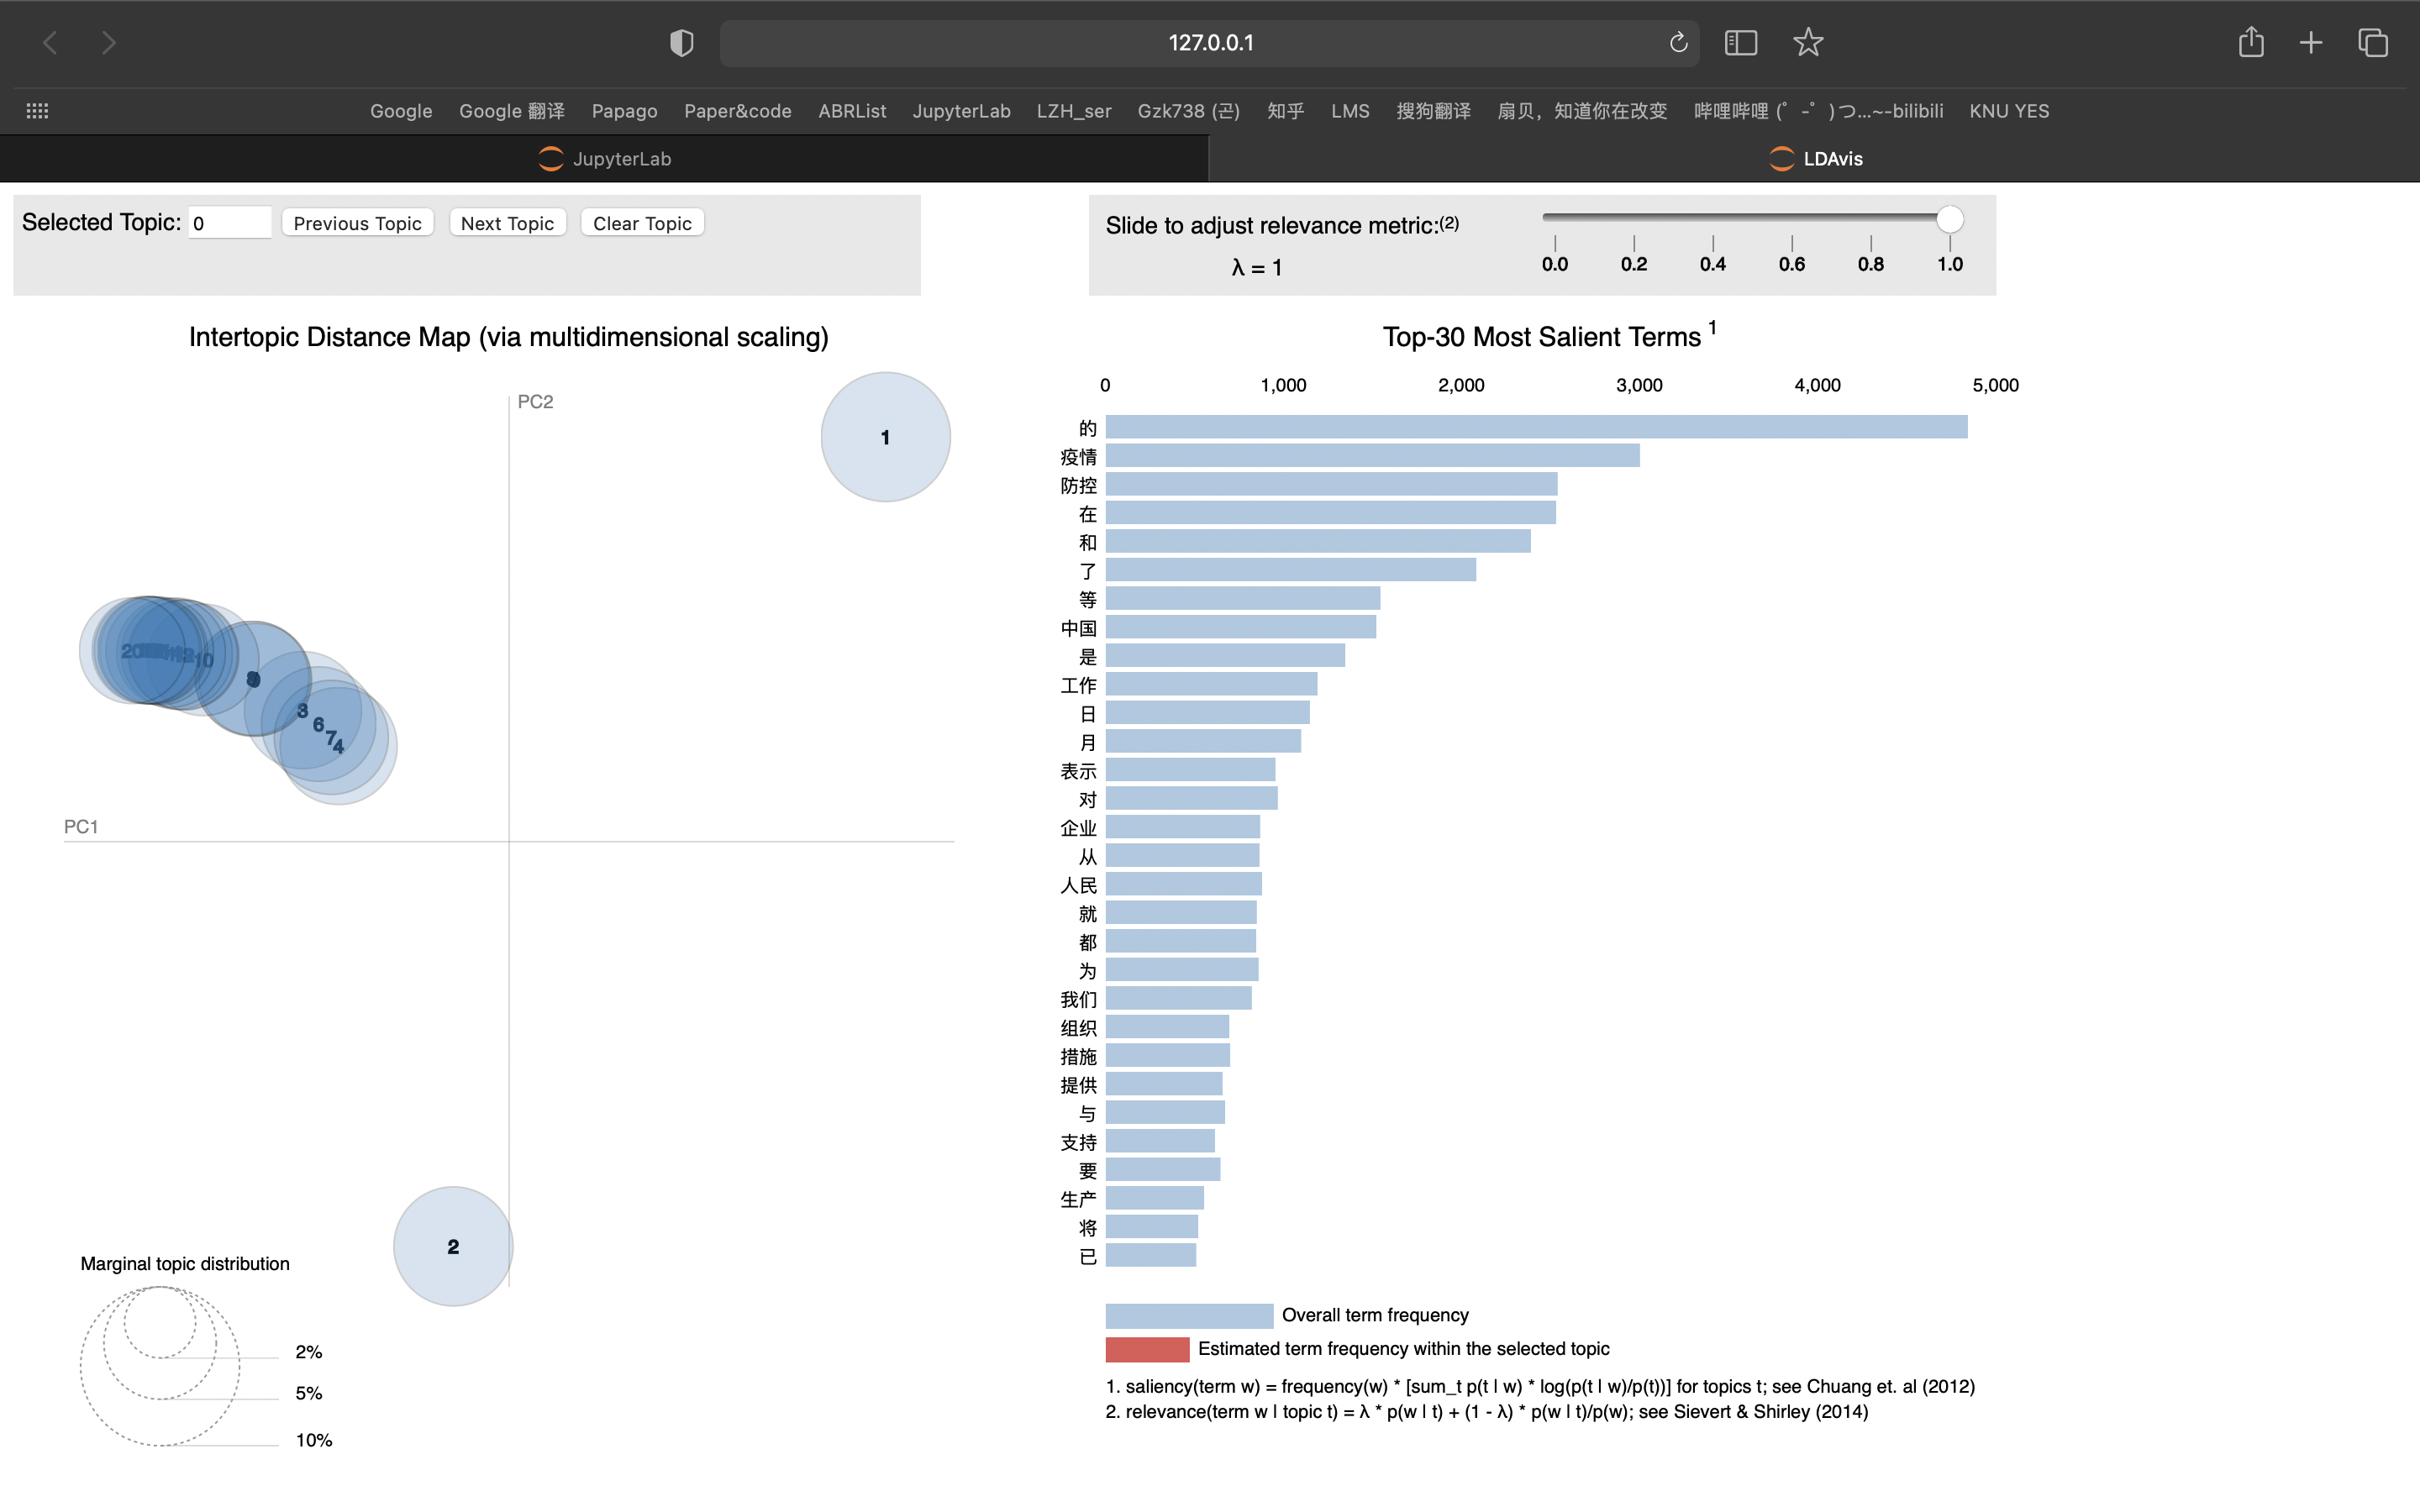

In [ ]:
import pyLDAvis.gensim

'''插入之前的代码片段'''

d=pyLDAvis.gensim.prepare(lda, corpus, dictionary)

'''
lda: 计算好的话题模型

corpus: 文档词频矩阵

dictionary: 词语空间
'''

pyLDAvis.show(d)		#展示在浏览器
# pyLDAvis.displace(d) #展示在notebook的output cell中
